# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import plotly.express as px

# Using web-scraping for data extraction

In [2]:
from datetime import date, timedelta

today = date.today()
yesterday = today - timedelta(days=1)

d1 = yesterday.strftime("%m-%d-%Y")
print("Yesterdays Date: ", d1)
file_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + d1 + '.csv'
df = pd.read_csv(file_url)
print(df)
#df[df['Province_State']=='New York']

Yesterdays Date:  06-13-2020
         FIPS     Admin2  Province_State      Country_Region  \
0     45001.0  Abbeville  South Carolina                  US   
1     22001.0     Acadia       Louisiana                  US   
2     51001.0   Accomack        Virginia                  US   
3     16001.0        Ada           Idaho                  US   
4     19001.0      Adair            Iowa                  US   
...       ...        ...             ...                 ...   
3736      NaN        NaN             NaN  West Bank and Gaza   
3737      NaN        NaN             NaN      Western Sahara   
3738      NaN        NaN             NaN               Yemen   
3739      NaN        NaN             NaN              Zambia   
3740      NaN        NaN             NaN            Zimbabwe   

              Last_Update        Lat       Long_  Confirmed  Deaths  \
0     2020-06-14 03:33:15  34.223334  -82.461707         63       0   
1     2020-06-14 03:33:15  30.295065  -92.414197        577 

# Map Visualisation using plotly express

In [3]:
data = df[['Confirmed','Lat','Long_','Country_Region','Recovered','Deaths']]
data.rename( columns={'Lat':'lat','Long_':'lon'},inplace = True)
data = data.dropna()
fig = px.scatter_mapbox(data,lat="lat", lon="lon", hover_name="Country_Region", hover_data=["Confirmed",'Recovered','Deaths'],
                        color_discrete_sequence=["firebrick"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Feature Reduction

In [4]:
df.drop(columns=['FIPS', 'Admin2', 'Province_State', 'Last_Update', 'Lat', 'Long_', 'Combined_Key'], inplace=True)
all_cases=df.groupby('Country_Region').sum()
all_cases

,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
Country_Region,,,,,,
Afghanistan,24102,451,4201,19450,61.913761,1.871214
Albania,1464,36,1039,389,50.872194,2.459016
Algeria,10810,760,7420,2630,24.651637,7.030527
Andorra,853,51,781,21,1103.992752,5.978898
Angola,138,6,61,71,0.419883,4.347826
...,...,...,...,...,...,...
West Bank and Gaza,489,3,415,71,9.585574,0.613497
Western Sahara,9,1,8,0,1.506705,11.111111
Yemen,705,160,39,506,2.363712,22.695035


In [5]:
all_cases['Mortality Rate (per 100)'] = np.round(100*all_cases['Deaths']/all_cases['Confirmed'],2)
data = all_cases.nlargest(30,'Confirmed')
x = data.index

# Countries and Life Impact

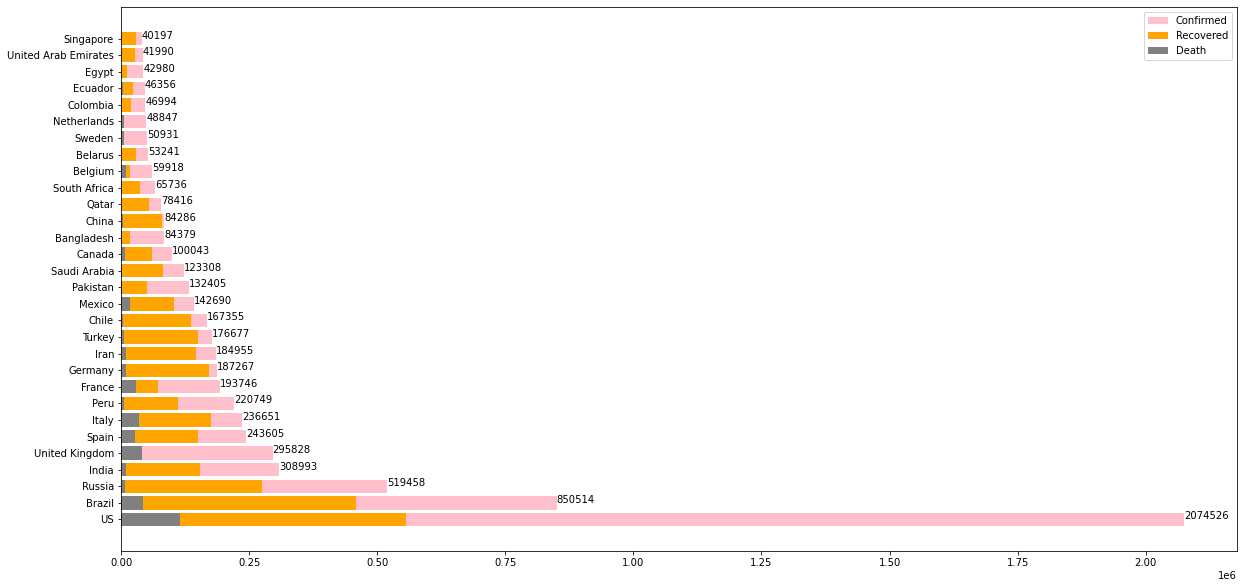

In [6]:
plt.figure(figsize = (20,10))
plt.barh(x,data['Confirmed'],color = 'pink',label='Confirmed')
for index, value in enumerate(data['Confirmed']):
    plt.text(value, index, str(value))
plt.barh(x,data['Recovered'],color = 'orange',label='Recovered')
plt.barh(x,data['Deaths'],color = 'grey',label='Death')
plt.legend()

# Scatter-Plot

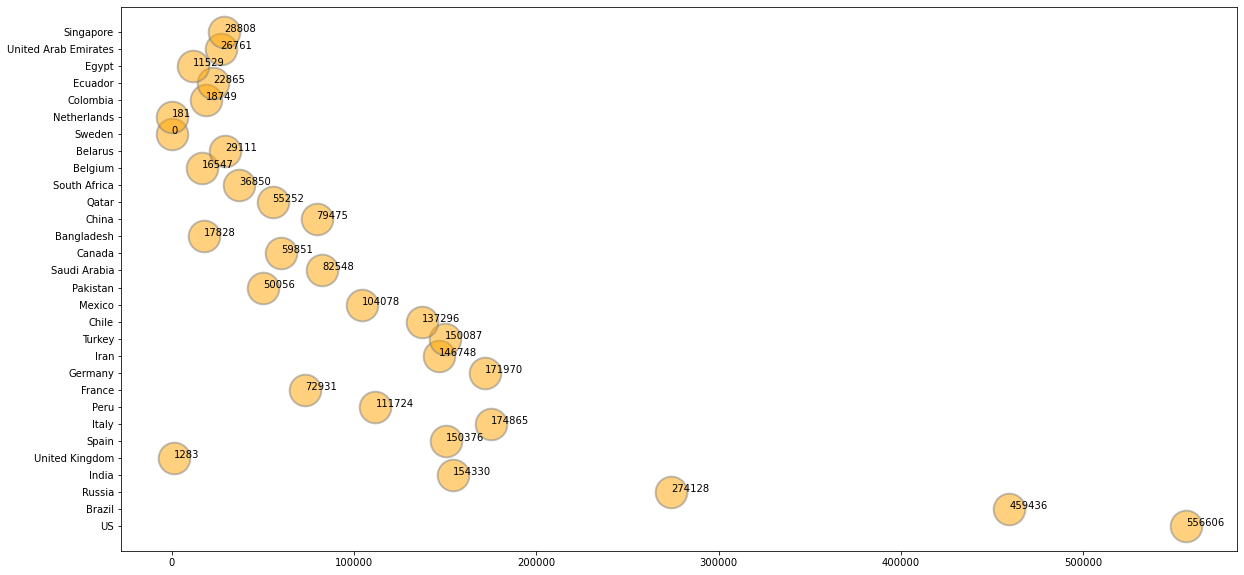

In [7]:
plt.figure(figsize = (20,10))
plt.scatter(data['Recovered'],x,alpha=0.5,s = 1000,cmap="BuPu",color = 'orange',label='Recovered',edgecolors="grey", linewidth=2)
for index, value in enumerate(data['Recovered']):
    plt.text(value, index, str(value))

# Economical Aspects

In [8]:
web_content = requests.get('https://unemploymentinindia.cmie.com/').text

In [9]:
soup = BeautifulSoup(web_content, "html.parser")

extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td'))
    
    if len(stat) == 2: 
        stats.append(stat)

#now convert the data into a pandas dataframe for further processing
new_cols = ["States/UT", "Unemployed %"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.drop(state_data.head(8).index,inplace=True)
state_data.drop(state_data.tail(8).index,inplace=True)
state_data

,States/UT,Unemployed %
8,Andhra Pradesh,17.5
9,Assam,9.6
10,Bihar,46.2
11,Chhattisgarh,11.3
12,Delhi,44.9
13,Goa,21.2
14,Gujarat,13.6
15,Haryana,35.7
16,Himachal Pradesh,28.2
17,Jammu & Kashmir,5.2


# Unemployed Percentage in India

In [10]:
state_data['Unemployed %']=state_data['Unemployed %'].map(float)

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text major ticklabel objects>)

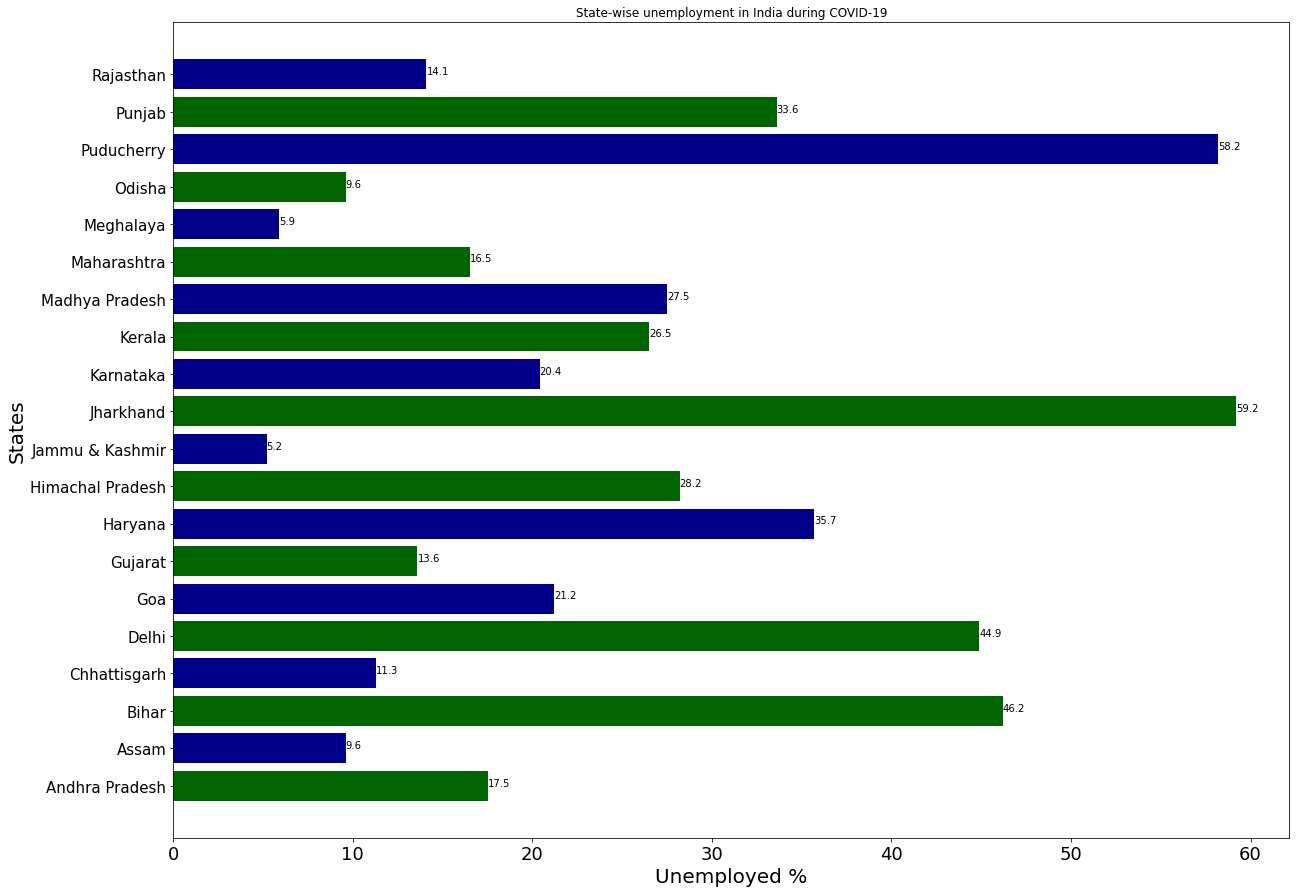

In [11]:
plt.figure(figsize=(20,15))
plt.barh(state_data['States/UT'],state_data['Unemployed %'],color=['darkgreen', 'darkblue'])
for index, value in enumerate(state_data['Unemployed %']):
    plt.text(value, index, str(value))
plt.title('State-wise unemployment in India during COVID-19')  
plt.xlabel('Unemployed %',fontsize=20)
plt.ylabel('States',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=18)